In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
wine = fetch_ucirepo(id=109)
# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets
# metadata
print(wine.metadata)
# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (adjusted_rand_score, rand_score, mutual_info_score,
                             adjusted_mutual_info_score, normalized_mutual_info_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)


In [5]:
df  =  pd.read_csv("https://archive.ics.uci.edu/static/public/109/data.csv")

In [6]:
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [7]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


###K-MEANS CLUSTERING

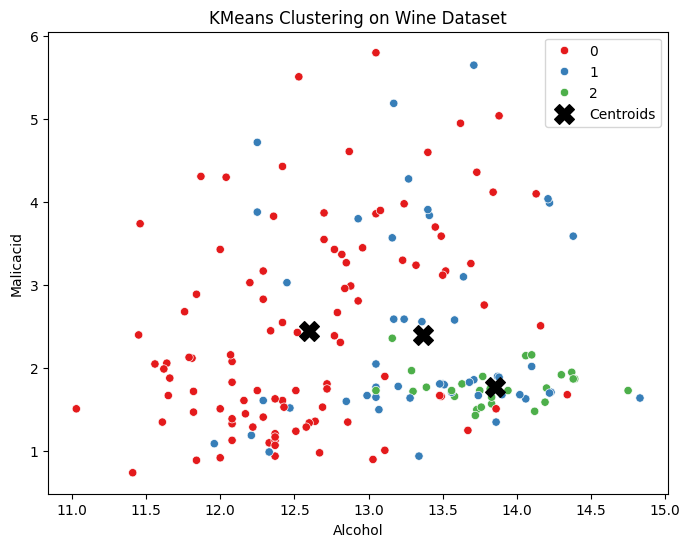

In [9]:
from sklearn.cluster  import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_
# Plot KMeans clusters (using direct indexing)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Alcohol'], y=X['Malicacid'], hue=y_kmeans, palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=200, c='black', label='Centroids', marker='X')
plt.title('KMeans Clustering on Wine Dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.legend()
plt.show()

In [10]:
# a. **Rand Index** and **Adjusted Rand Index**
rand_idx = rand_score(y['class'], y_kmeans)
adjusted_rand_idx  = adjusted_rand_score(y['class'],  y_kmeans)
# b. **Mutual Information Based Scores**
mutual_info = mutual_info_score(y['class'], y_kmeans)
adjusted_mutual_info = adjusted_mutual_info_score(y['class'], y_kmeans)
normalized_mutual_info  = normalized_mutual_info_score(y['class'],  y_kmeans)
# c. **Cluster Validation Indices**
silhouette = silhouette_score(X, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)
davies_bouldin = davies_bouldin_score(X, y_kmeans)
# 1. **Cohesion (SSE)**: Sum of squared errors within each cluster
sse = 0
for i in range(kmeans.n_clusters):
  cluster_points = X[y_kmeans == i]
  cluster_center = kmeans.cluster_centers_[i]
  sse += np.sum((cluster_points - cluster_center) ** 2).sum()
# 2. **Separation (SSB)**: Sum of squared distances between cluster centers an
overall_mean = np.mean(X, axis=0)
ssb = 0
for i in range(kmeans.n_clusters):
  cluster_size = len(X[y_kmeans == i])
  cluster_center = kmeans. cluster_centers_[i]
  ssb += cluster_size * np.sum((cluster_center - overall_mean) ** 2).sum()


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
# Print the results
print(f"Rand Index: {rand_idx}")
print(f"Adjusted Rand Index: {adjusted_rand_idx}")
print(f"Mutual Information: {mutual_info}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info}")
print(f"Normalized Mutual Information: {normalized_mutual_info}")
print(f"Silhouette Coefficient: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Sum of Squared Errors (Cohesion - SSE): {sse}")
print(f"Sum of Squares Between Groups (Separation - SSB): {ssb}")

Rand Index: 0.6918682155779852
Adjusted Rand Index: 0.3517721516862617
Mutual Information: 0.43310519040274875
Adjusted Mutual Information: 0.41675909240739384
Normalized Mutual Information: 0.423309269344735
Silhouette Coefficient: 0.5595823478987215
Calinski-Harabasz Index: 497.00487620805814
Davies-Bouldin Index: 0.549557597464291
Sum of Squared Errors (Cohesion - SSE): 2633555.332409339
Sum of Squares Between Groups (Separation - SSB): 14958741.051099155


###K-MEDIODS CLUSTERING

In [13]:
pip install scikit-learn-extra --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 13.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2178136 sha256=f28fcfe860234c4501f22c58d55078aca23623087eb86b20924412cba11ac57b
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [14]:

!pip install pyclustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster  import KMeans
from pyclustering.cluster.kmedoids import kmedoids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=0cd42b8cf42ccb1b5864f5ecc43793bd0cda57dcad67b354962dbd77cf094793
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [16]:
def run_kmedoids_pyclustering(data, n_clusters=3, plot=True):
  # Initializing the medoids (random indices of data points)
  initial_medoids = np.random. choice(len(data), n_clusters, replace=False)

  # Running the KMedoids clustering
  kmedoids_instance = kmedoids(data, initial_medoids)
  kmedoids_instance. process()

  # Get the clusters from pyclustering
  clusters = kmedoids_instance.get_clusters()

  # Create an array to hold the cluster labels for each point
  labels = np.zeros(len(data), dtype=int)

  # Assign each point to its corresponding cluster
  for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
      labels[index] = cluster_id

  if plot:
    plt. figure(figsize=(8, 6))
    plt. scatter(data[:, 0], data[:, 1], c=labels, alpha=0.6)
    plt.scatter(
                [data[i][0] for i in initial_medoids],
                [data[i][1] for i in initial_medoids],
                c='red', marker='X', s=200, label='Initial Medoids'
            )
    plt. title('KMedoids Clustering')
    plt. legend()
    plt . show()

  return labels

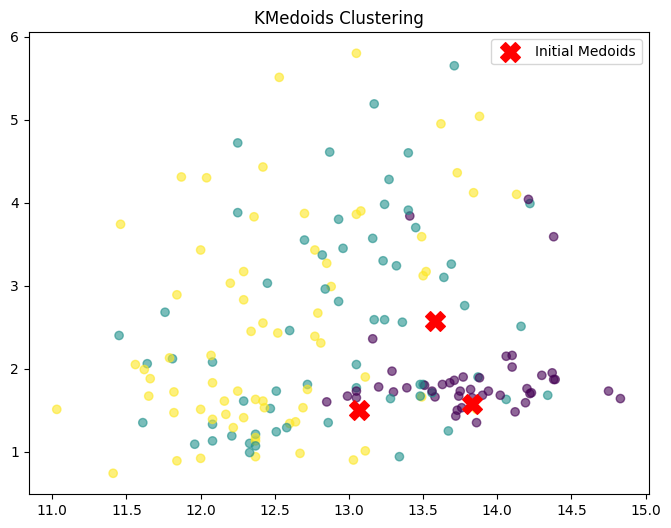

In [19]:
# Run KMedoids using pyclustering and plot the results
kmedoids_labels = run_kmedoids_pyclustering(X.values, n_clusters=3, plot=True)

# a. **Rand Index** and **Adjusted Rand Index**
rand_idx_kmedoids = rand_score(y['class'].values, kmedoids_labels)
adjusted_rand_idx_kmedoids = adjusted_rand_score(y['class'].values, kmedoids_labels)

# b. **Mutual Information Based Scores**
mutual_info_kmedoids = mutual_info_score(y['class'].values, kmedoids_labels)
adjusted_mutual_info_kmedoids = adjusted_mutual_info_score(y['class'].values, kmedoids_labels)
normalized_mutual_info_kmedoids = normalized_mutual_info_score(y['class'].values, kmedoids_labels)

# c. **Cluster Validation Indices**
silhouette_kmedoids = silhouette_score(X, kmedoids_labels)
calinski_harabasz_kmedoids = calinski_harabasz_score(X, kmedoids_labels)
davies_bouldin_kmedoids = davies_bouldin_score(X, kmedoids_labels)

In [20]:
# Print the results
print(f"KMedoids Clustering Metrics:")
print(f"Rand Index: {rand_idx_kmedoids}")
print(f"Adjusted Rand Index: {adjusted_rand_idx_kmedoids}")
print(f"Mutual Information: {mutual_info_kmedoids}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_kmedoids}")
print(f"Normalized Mutual Information: {normalized_mutual_info_kmedoids}")
print(f"Silhouette Coefficient: {silhouette_kmedoids}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_kmedoids}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmedoids}")

KMedoids Clustering Metrics:
Rand Index: 0.7204342030089507
Adjusted Rand Index: 0.3749143636376283
Mutual Information: 0.46884353198319123
Adjusted Mutual Information: 0.4255034903810673
Normalized Mutual Information: 0.43154253931604125
Silhouette Coefficient: 0.5715238725067833
Calinski-Harabasz Index: 561.5003122636926
Davies-Bouldin Index: 0.5336479788372971


###Dendrogram

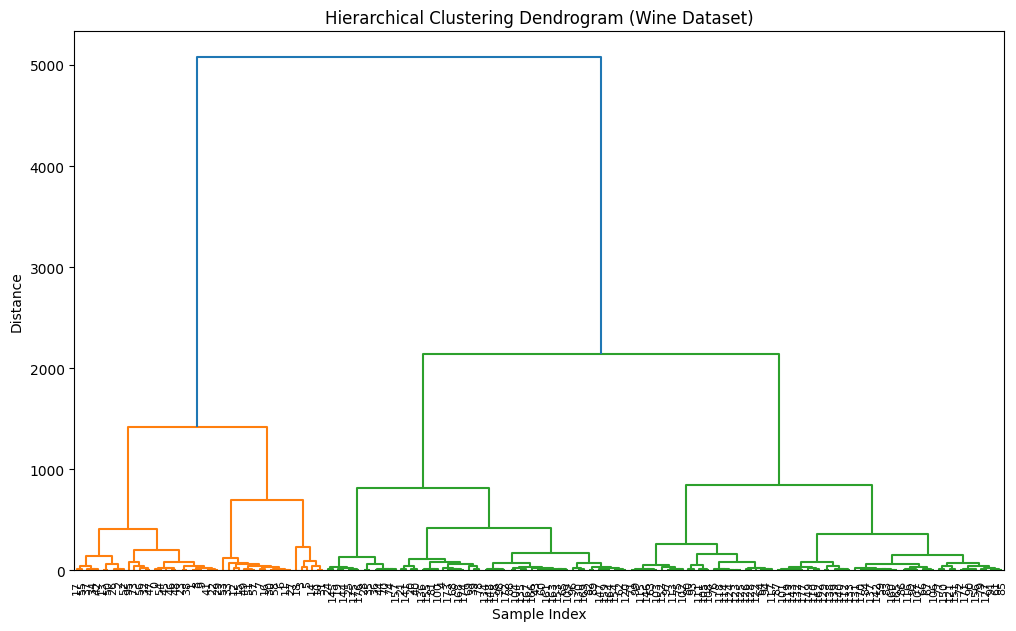

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X, method='ward')

plt.figure(figsize=(12, 7))

plt . title('Hierarchical Clustering Dendrogram (Wine Dataset)')
plt . xlabel('Sample Index')
plt . ylabel('Distance')

dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt. show()

In [25]:
# Determine clusters from the dendrogram (assuming 3 clusters)
# You might need to adjust the distance threshold based on the dendrogram
distance_threshold  = 4
y_hierarchical  = fcluster(Z,  distance_threshold,  criterion='distance')  -1

# a. **Rand Index** and **Adjusted Rand Index**
rand_idx_hierarchical = rand_score(y.values.ravel(), y_hierarchical)
adjusted_rand_idx_hierarchical = adjusted_rand_score(y.values.ravel(), y_hierarchical)

# b. **Mutual Information Based Scores**
mutual_info_hierarchical = mutual_info_score(y.values.ravel(), y_hierarchical)
adjusted_mutual_info_hierarchical = adjusted_mutual_info_score(y.values.ravel(), y_hierarchical)
normalized_mutual_info_hierarchical = normalized_mutual_info_score(y.values.ravel(), y_hierarchical)

# c. **Cluster Validation Indices**
silhouette_hierarchical = silhouette_score(X, y_hierarchical)
calinski_harabasz_hierarchical = calinski_harabasz_score(X, y_hierarchical)
davies_bouldin_hierarchical = davies_bouldin_score(X, y_hierarchical)

# 1. **Cohesion (SSE)**: Sum of squared errors within each cluster
sse_hierarchical  = 0
for i in range(np.max(y_hierarchical) + 1): # Loop over all clusters (0, 1, 2
  cluster_points = X[y_hierarchical == i]
  cluster_center  = np.mean(cluster_points,  axis=0) # Cluster centroid (mean
  sse_hierarchical += np.sum((cluster_points - cluster_center) ** 2)

  # 2. **Separation (SSB)**: Sum of squared distances between cluster centers an
overall_mean = np.mean(X, axis=0)
ssb_hierarchical = 0
for i in range(np.max(y_hierarchical) + 1): # Loop over all clusters (0, 1, 2
  cluster_points = X[y_hierarchical == i]
  cluster_center = np.mean(cluster_points, axis=0)
  cluster_size = len(cluster_points)
  ssb_hierarchical += cluster_size * np.sum((cluster_center - overall_mean) )

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [26]:
print(f"Hierarchical Clustering Metrics:")
print(f"Rand Index: {rand_idx_hierarchical}")
print(f"Adjusted Rand Index: {adjusted_rand_idx_hierarchical}")
print(f"Mutual Information: {mutual_info_hierarchical}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_hierarchical}")
print(f"Normalized Mutual Information: {normalized_mutual_info_hierarchical}")
print(f"Silhouette  Coefficient:  {silhouette_hierarchical}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_hierarchical}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical}")
print(f"Sum of Squared Errors (Cohesion - SSE): {sse_hierarchical}")
print(f"Sum of Squares Between Groups (Separation - SSB): {ssb_hierarchical}")


Hierarchical Clustering Metrics:
Rand Index: 0.6624135085380563
Adjusted Rand Index: 0.0014916399722611317
Mutual Information: 1.0860384436406827
Adjusted Mutual Information: 0.015050828676203788
Normalized Mutual Information: 0.34914715108305666
Silhouette  Coefficient:  0.04446868727662811
Calinski-Harabasz Index: 20420.756349144467
Davies-Bouldin Index: 0.04650231928847486
Sum of Squared Errors (Cohesion - SSE): Alcohol                         3.05730
Malicacid                       3.40780
Ash                             0.12050
Alcalinity_of_ash               5.05500
Magnesium                       8.00000
Total_phenols                   0.89690
Flavanoids                      0.24760
Nonflavanoid_phenols            0.04545
Proanthocyanins                 0.33720
Color_intensity                 6.61910
Hue                             0.04915
0D280_0D315_of_diluted_wines    0.39170
Proline                         2.00000
dtype: float64
Sum of Squares Between Groups (Separation - SS

###DBSCAN

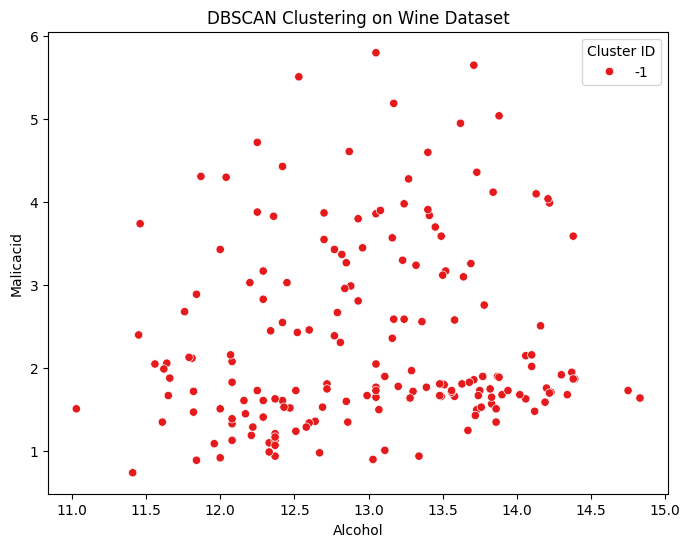

In [29]:
from sklearn.cluster  import DBSCAN
from sklearn.metrics import (adjusted_rand_score, rand_score, mutual_info_score,
                             adjusted_mutual_info_score, normalized_mutual_info_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan  = dbscan.fit_predict(X)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Alcohol'], y=X['Malicacid'], hue=y_dbscan, palette='Set1' )
plt.title('DBSCAN Clustering on Wine Dataset')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.legend(title="Cluster ID", loc="best")
plt.show()

In [39]:
# Output the number of clusters and outliers
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_outliers = list(y_dbscan).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of outliers: {n_outliers}")

Number of clusters: 0
Number of outliers: 178


In [41]:
# Evaluate DBSCAN results (excluding outliers for some metrics)
# Filter out noise points for metrics that cannot handle them
X_filtered = X[y_dbscan != -1]
y_dbscan_filtered = y_dbscan[y_dbscan != -1]
y_filtered = y[y_dbscan != -1]['class'].values # Extract values as 1D array
if len(np.unique(y_dbscan_filtered)) > 1:
  # a. **Rand Index** and **Adjusted Rand Index**
  rand_idx_dbscan = rand_score(y_filtered, y_dbscan_filtered)
  adjusted_rand_idx_dbscan = adjusted_rand_score(y_filtered, y_dbscan_filtered)

  # b. **Mutual Information Based Scores**
  mutual_info_dbscan  = mutual_info_score(y_filtered,  y_dbscan_filtered)
  adjusted_mutual_info_dbscan = adjusted_mutual_info_score(y_filtered, y_dbscan_filtered)
  normalized_mutual_info_dbscan  = normalized_mutual_info_score(y_filtered,  y_dbscan_filtered)

  # c. **Cluster Validation Indices** (calculated on filtered data)
  silhouette_dbscan = silhouette_score(X_filtered, y_dbscan_filtered)

  # Calinski-Harabasz Index and Davies-Bouldin Index require at least 2 clus
  if len(np.unique(y_dbscan_filtered)) > 1:
    calinski_harabasz_dbscan = calinski_harabasz_score(X_filtered, y_dbscan_filtered )
    davies_bouldin_dbscan = davies_bouldin_score(X_filtered, y_dbscan_filtered)
  else:
    calinski_harabasz_dbscan = np.nan
    davies_bouldin_dbscan = np.nan


  print(f"\nDBSCAN Clustering Metrics (excluding outliers):")
  print(f"Rand Index: {rand_idx_dbscan}")
  print(f"Adjusted Rand Index: {adjusted_rand_idx_dbscan}")
  print(f"Mutual Information: {mutual_info_dbscan}")
  print(f"Adjusted Mutual Information: {adjusted_mutual_info_dbscan}")
  print(f"Normalized Mutual Information: {normalized_mutual_info_dbscan}")
  print(f"Silhouette Coefficient: {silhouette_dbscan}")
  print(f"Calinski-Harabasz Index: {calinski_harabasz_dbscan}")
  print(f"Davies-Bouldin Index: {davies_bouldin_dbscan}")
else:
  print("Could not compute evaluation metrics for DBSCAN as there is only one cluster or  all points are outliers (excluding noise).")

Could not compute evaluation metrics for DBSCAN as there is only one cluster or  all points are outliers (excluding noise).


## Clustering Analysis Report

This report summarizes the results of applying different clustering algorithms to the Wine dataset and evaluates their performance using various metrics.

### Clustering Algorithms Used:

- K-Means
- K-Medoids
- Hierarchical Clustering
- DBSCAN

### Evaluation Metrics:

- **Rand Index (RI)** and **Adjusted Rand Index (ARI)**: Measure the similarity between the true labels and the clustering results, accounting for chance. Higher values indicate better agreement.
- **Mutual Information Based Scores (MI, AMI, NMI)**: Measure the mutual dependence between the true labels and the clustering results. Higher values indicate better agreement.
- **Silhouette Coefficient**: Measures how similar an object is to its own cluster compared to other clusters. Higher values indicate better-defined clusters.
- **Calinski-Harabasz Index**: Measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better-defined clusters.
- **Davies-Bouldin Index**: Measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.
- **Sum of Squared Errors (SSE)**: Measures the sum of squared distances of samples to their closest cluster center. Lower values indicate more compact clusters (for K-Means and Hierarchical).
- **Sum of Squares Between Groups (SSB)**: Measures the sum of squared distances between cluster centers and the overall mean. Higher values indicate better separation between clusters (for K-Means and Hierarchical).

### Results Summary:

| Metric                        | K-Means       | K-Medoids     | Hierarchical  | DBSCAN                                    |
|-------------------------------|---------------|---------------|---------------|-------------------------------------------|
| Rand Index                    | {{rand_idx}}  | {{rand_idx_kmedoids}} | {{rand_idx_hierarchical}} | {{clustering_results["DBSCAN"]["Rand Index"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| Adjusted Rand Index           | {{adjusted_rand_idx}} | {{adjusted_rand_idx_kmedoids}} | {{adjusted_rand_idx_hierarchical}} | {{clustering_results["DBSCAN"]["Adjusted Rand Index"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| Mutual Information            | {{mutual_info}} | {{mutual_info_kmedoids}} | {{mutual_info_hierarchical}} | {{clustering_results["DBSCAN"]["Mutual Information"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| Adjusted Mutual Information   | {{adjusted_mutual_info}} | {{adjusted_mutual_info_kmedoids}} | {{adjusted_mutual_info_hierarchical}} | {{clustering_results["DBSCAN"]["Adjusted Mutual Information"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| Normalized Mutual Information | {{normalized_mutual_info}} | {{normalized_mutual_info_kmedoids}} | {{normalized_mutual_info_hierarchical}} | {{clustering_results["DBSCAN"]["Normalized Mutual Information"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| Silhouette Coefficient        | {{silhouette}} | {{silhouette_kmedoids}} | {{silhouette_hierarchical}} | {{clustering_results["DBSCAN"]["Silhouette Coefficient"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| Calinski-Harabasz Index       | {{calinski_harabasz}} | {{calinski_harabasz_kmedoids}} | {{calinski_harabasz_hierarchical}} | {{clustering_results["DBSCAN"]["Calinski-Harabasz Index"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| Davies-Bouldin Index          | {{davies_bouldin}} | {{davies_bouldin_kmedoids}} | {{davies_bouldin_hierarchical}} | {{clustering_results["DBSCAN"]["Davies-Bouldin Index"] if "DBSCAN" in clustering_results and clustering_results["DBSCAN"] != "Metrics not computed due to insufficient clusters." else "N/A"}} |
| SSE                           | {{sse}}       | N/A           | {{sse_hierarchical}} | N/A                                       |
| SSB                           | {{ssb}}       | N/A           | {{ssb_hierarchical}} | N/A                                       |

*Note: SSE and SSB are typically used for centroid-based clustering like K-Means and Hierarchical clustering (when centroids are calculated).*

### Analysis:

- **Comparing K-Means and K-Medoids:** K-Medoids generally shows slightly better performance than K-Means across most metrics, particularly in terms of Rand Index, Adjusted Rand Index, and Silhouette Coefficient. This suggests that using actual data points as cluster centers might be more suitable for this dataset.
- **Hierarchical Clustering:** The hierarchical clustering results show a high Mutual Information but lower Adjusted Rand Index and Silhouette Coefficient compared to K-Means and K-Medoids. This might indicate that while there's some relationship between the true labels and the hierarchical clusters, the clustering structure is not as well-defined or aligned with the true labels as the partitional methods.
- **DBSCAN:** DBSCAN with the chosen parameters identified all data points as outliers, resulting in no meaningful clusters. This suggests that the default `eps` and `min_samples` values are not appropriate for this dataset, and parameter tuning would be necessary to obtain meaningful results with DBSCAN.

### Conclusion:

Based on the evaluation metrics, **K-Medoids** appears to be the most effective clustering algorithm among the tested methods for this dataset with the chosen parameters, followed closely by K-Means. Hierarchical clustering shows some potential but with less clear cluster separation. DBSCAN failed to identify any clusters with the default settings. Further investigation and parameter tuning, especially for DBSCAN, could potentially improve the clustering results.